<a href="https://colab.research.google.com/github/kishan0725/Happy-Vs-Sad/blob/master/Happy_Vs_Sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [0]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

--2019-07-14 07:10:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2019-07-14 07:10:29 (199 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:
# Directory with our happy pictures
happy_dir = os.path.join('/tmp/h-or-s/happy')

# Directory with our sad pictures
sad_dir = os.path.join('/tmp/h-or-s/sad')

In [0]:
train_happy = os.listdir(happy_dir)
print(train_happy[:10])

train_sad = os.listdir(sad_dir)
print(train_sad[:10])

['happy1-03.png', 'happy1-14.png', 'happy2-17.png', 'happy2-15.png', 'happy1-10.png', 'happy2-09.png', 'happy1-08.png', 'happy1-12.png', 'happy2-10.png', 'happy1-17.png']
['sad1-08.png', 'sad2-03.png', 'sad2-05.png', 'sad2-07.png', 'sad1-00.png', 'sad1-03.png', 'sad2-12.png', 'sad2-16.png', 'sad1-17.png', 'sad1-13.png']


In [0]:
print('total training happy images:', len(os.listdir(happy_dir)))
print('total training sad images:', len(os.listdir(sad_dir)))

total training happy images: 40
total training sad images: 40


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

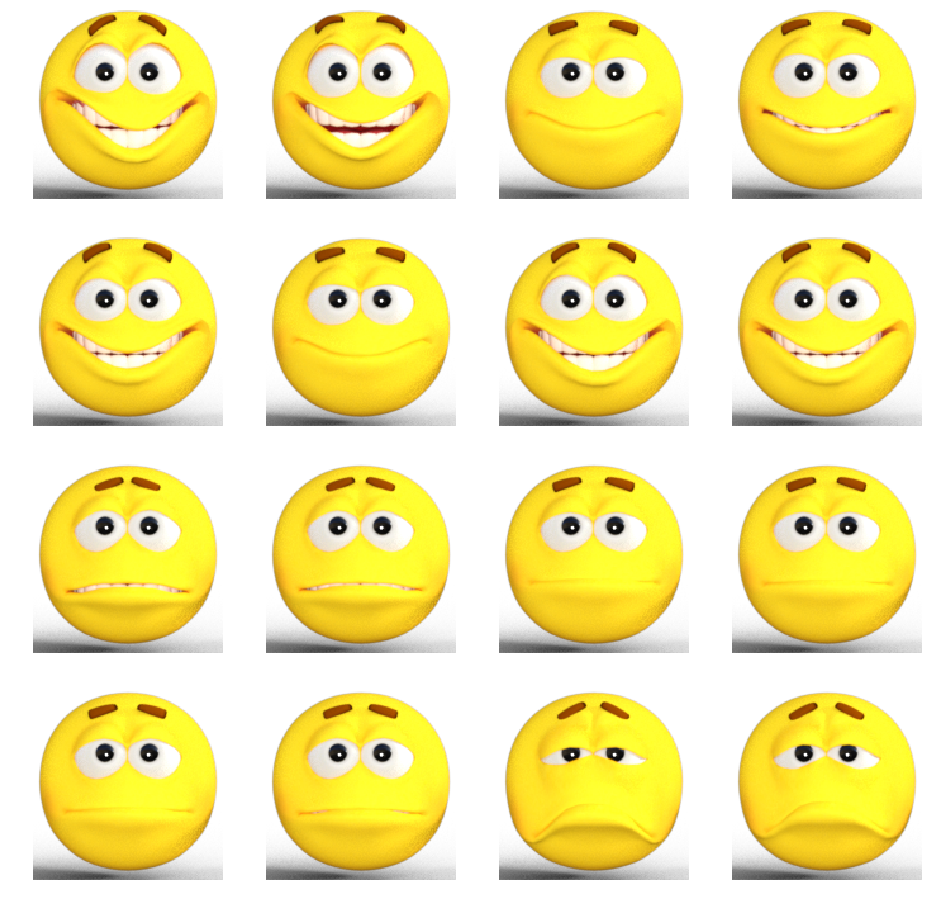

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(happy_dir, fname) 
                for fname in train_happy[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(sad_dir, fname) 
                for fname in train_sad[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 200x200 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])



W0714 07:11:59.817315 139725692696448 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

W0714 07:12:10.414414 139725692696448 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen =  ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 150x150
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [0]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
      train_generator,
      steps_per_epoch=16,  
      epochs=15,
      verbose=1,callbacks=[callbacks])
      # Your Code Here)
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
16/16 [==============================] - 5s 300ms/step - loss: 1.6583 - acc: 0.5969
Epoch 2/15
16/16 [==============================] - 2s 100ms/step - loss: 0.2275 - acc: 0.9375
Epoch 3/15
16/16 [==============================] - 2s 102ms/step - loss: 0.0664 - acc: 0.9844
Epoch 4/15
14/16 [=========================>....] - ETA: 0s - loss: 0.0032 - acc: 1.0000
Reached 99.9% accuracy so cancelling training!
16/16 [==============================] - 2s 100ms/step - loss: 0.0030 - acc: 1.0000


In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a happy")
  else:
    print(fn + " is a sad")

Saving emoticon-1610573_960_720.png to emoticon-1610573_960_720 (2).png
Saving emoticon-2643814_960_720.jpg to emoticon-2643814_960_720.jpg
[1.]
emoticon-1610573_960_720.png is a happy
[1.]
emoticon-2643814_960_720.jpg is a happy


In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)